In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/healthcare_dataset.csv")


In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.drop(["Name","Doctor","Hospital","Room Number"], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
#check for null values
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
Dtypes,int64,object,object,object,object,object,float64,object,object,object,object
Num_Uniq,77,2,8,6,1827,5,50000,3,1856,5,3


In [ ]:
cols_to_change = ["Gender","Blood Type","Medical Condition","Date of Admission","Insurance Provider","Admission Type","Discharge Date","Medication","Test Results"]
df[cols_to_change] = df[cols_to_change].astype("category")

In [ ]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
Dtypes,int64,category,category,category,category,category,float64,category,category,category,category
Num_Uniq,77,2,8,6,1827,5,50000,3,1856,5,3


In [ ]:
num_cols = df.select_dtypes("number").columns.tolist()


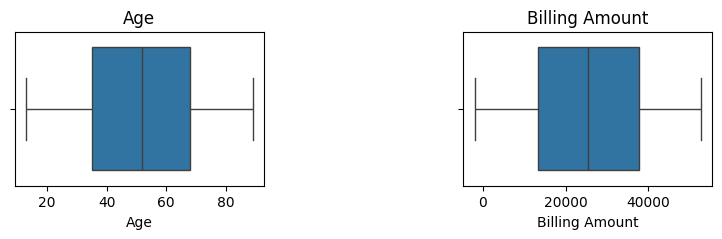

In [ ]:
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols[:]):
    plt.subplot(1, 2, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [ ]:
print(df.duplicated().sum())


534


In [ ]:
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = df.select_dtypes("number").columns
scaler = MinMaxScaler()
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


In [ ]:
df['year of Admission'] = df['Date of Admission'].dt.year
df['month of Admission'] = df['Date of Admission'].dt.month
df['day of Admission'] = df['Date of Admission'].dt.day

df['Discharge year'] = df['Discharge Date'].dt.year
df['Discharge month'] = df['Discharge Date'].dt.month
df['Discharge day'] = df['Discharge Date'].dt.day

In [ ]:
df.to_csv('/content/healthcare_dataset.csv', index=False)

In [ ]:
df.drop(['Date of Admission','Discharge Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,year of Admission,month of Admission,day of Admission,Discharge year,Discharge month,Discharge day
0,0.223684,Male,B-,Cancer,Blue Cross,0.380933,Urgent,Paracetamol,Normal,2024,1,31,2024,2,2
1,0.644737,Male,A+,Obesity,Medicare,0.650904,Emergency,Ibuprofen,Inconclusive,2019,8,20,2019,8,26
2,0.828947,Female,A-,Obesity,Aetna,0.547053,Emergency,Aspirin,Normal,2022,9,22,2022,10,7
3,0.197368,Female,O+,Diabetes,Medicare,0.728798,Elective,Ibuprofen,Abnormal,2020,11,18,2020,12,18
4,0.394737,Female,AB+,Cancer,Aetna,0.296622,Urgent,Penicillin,Abnormal,2022,9,19,2022,10,9


In [ ]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,year of Admission,month of Admission,day of Admission,Discharge year,Discharge month,Discharge day
Dtypes,float64,category,category,category,category,float64,category,category,category,int32,int32,int32,int32,int32,int32
Num_Uniq,77,2,8,6,5,50000,3,5,3,6,12,31,6,12,31


In [ ]:
print(df["Gender"].unique())
print(df["Blood Type"].unique())
print(df["Medical Condition"].unique())
print(df["Admission Type"].unique())
print(df["Insurance Provider"].unique())
print(df["Medication"].unique())
print(df["Test Results"].unique())


['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-']
Categories (8, object): ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
Categories (6, object): ['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity']
['Urgent', 'Emergency', 'Elective']
Categories (3, object): ['Elective', 'Emergency', 'Urgent']
['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna']
Categories (5, object): ['Aetna', 'Blue Cross', 'Cigna', 'Medicare', 'UnitedHealthcare']
['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor']
Categories (5, object): ['Aspirin', 'Ibuprofen', 'Lipitor', 'Paracetamol', 'Penicillin']
['Normal', 'Inconclusive', 'Abnormal']
Categories (3, object): ['Abnormal', 'Inconclusive', 'Normal']


In [ ]:
labels ={"Gender":{'Male': 0, 'Female': 1},
         "Admission Type":{'Elective': 0, 'Emergency': 1,'Urgent':2},
         "Test Results":{'Abnormal': 0, 'Inconclusive': 1,'Normal':2}}

In [ ]:
df.replace(labels, inplace=True)


In [ ]:
!pip install category_encoders
from category_encoders import BinaryEncoder
binary_cols = ["Blood Type", "Medical Condition", "Insurance Provider", "Medication"]
binary_encoder = BinaryEncoder(cols=binary_cols)
df = binary_encoder.fit_transform(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
df.head()

,Age,Gender,Blood Type_0,Blood Type_1,Blood Type_2,Blood Type_3,Medical Condition_0,Medical Condition_1,Medical Condition_2,Insurance Provider_0,...,Medication_0,Medication_1,Medication_2,Test Results,year of Admission,month of Admission,day of Admission,Discharge year,Discharge month,Discharge day
0,0.223684,0,0,0,0,1,0,0,1,0,...,0,0,1,2,2024,1,31,2024,2,2
1,0.644737,0,0,0,1,0,0,1,0,0,...,0,1,0,1,2019,8,20,2019,8,26
2,0.828947,1,0,0,1,1,0,1,0,0,...,0,1,1,2,2022,9,22,2022,10,7
3,0.197368,1,0,1,0,0,0,1,1,0,...,0,1,0,0,2020,11,18,2020,12,18
4,0.394737,1,0,1,0,1,0,0,1,0,...,1,0,0,0,2022,9,19,2022,10,9


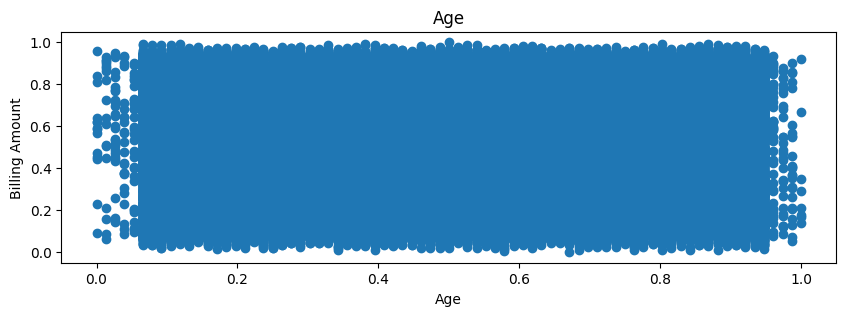

In [ ]:
num_cols = ['Age']

plt.figure(figsize = (10, 3))
for i, col in enumerate(num_cols):
  plt.subplot(1, 1, i + 1)
  plt.scatter(df[col], df['Billing Amount'])
  plt.xlabel(col)
  plt.ylabel('Billing Amount')
  plt.title(col)
plt.subplots_adjust(wspace = 0.5)
plt.show()

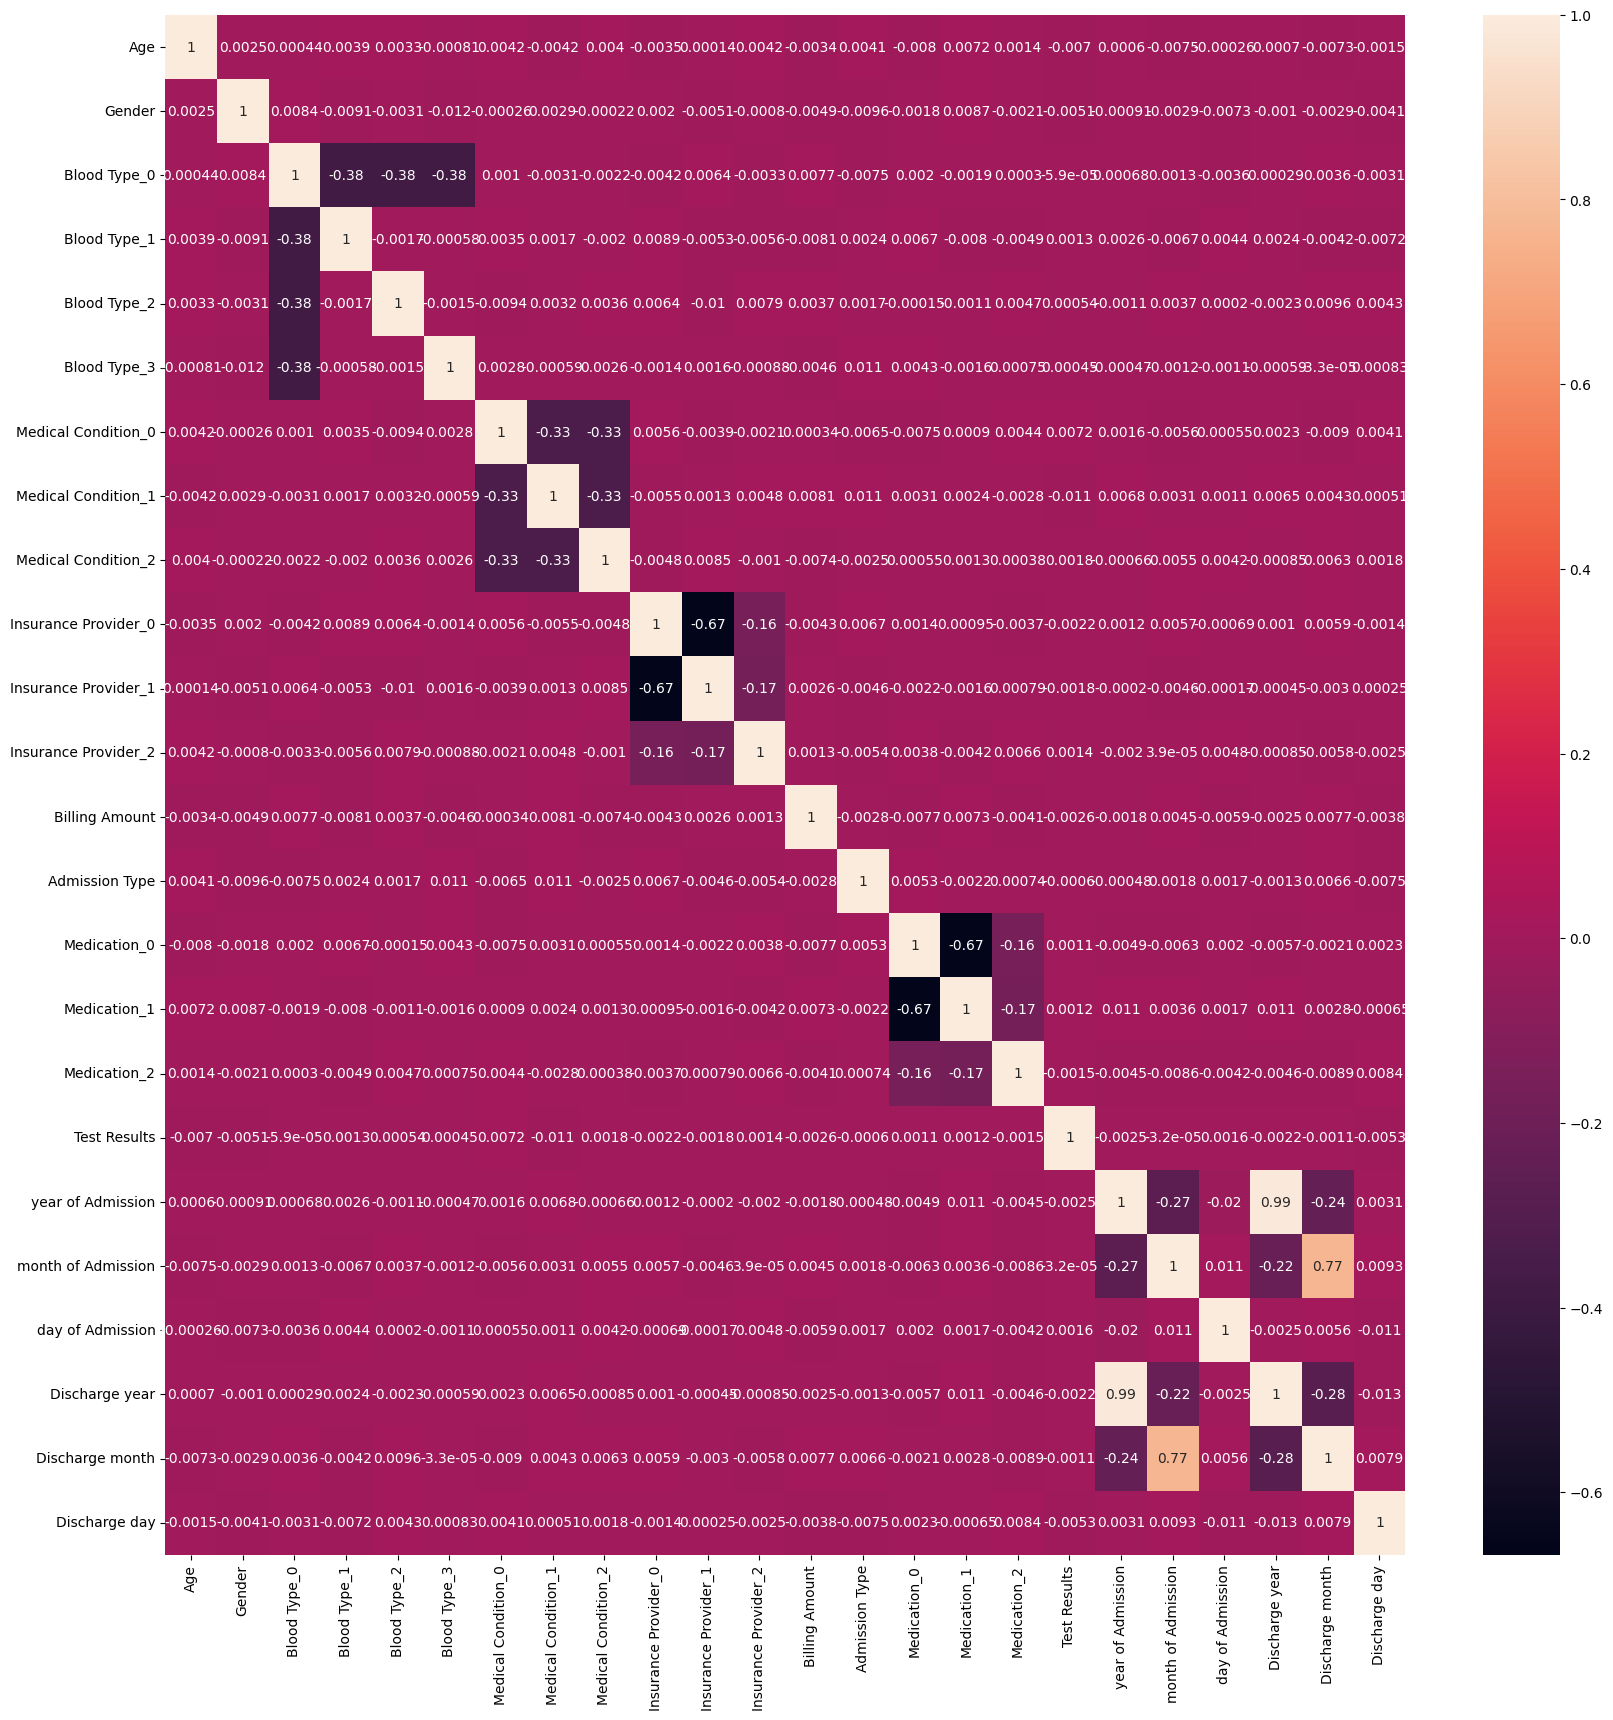

In [ ]:
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


In [ ]:
X = df.drop(columns=['Billing Amount'])

y = df['Billing Amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#check for null values
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio})

,Null,Null_ratio
Age,0,0.0
Gender,0,0.0
Blood Type_0,0,0.0
Blood Type_1,0,0.0
Blood Type_2,0,0.0
Blood Type_3,0,0.0
Medical Condition_0,0,0.0
Medical Condition_1,0,0.0
Medical Condition_2,0,0.0
Insurance Provider_0,0,0.0


In [ ]:
df.dropna(subset=['Discharge day'], inplace=True)

In [ ]:
#check for null values
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio})

,Null,Null_ratio
Age,0,0.0
Gender,0,0.0
Blood Type_0,0,0.0
Blood Type_1,0,0.0
Blood Type_2,0,0.0
Blood Type_3,0,0.0
Medical Condition_0,0,0.0
Medical Condition_1,0,0.0
Medical Condition_2,0,0.0
Insurance Provider_0,0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, MAE, MSE, r2))

    print(f"Model: {name}")
    print(f"Mean Absolute Error: {MAE:.2f}")
    print(f"Mean Squared Error: {MSE:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 40)

import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R2"])

print(results_df)


Model: Linear Regression
Mean Absolute Error: 0.22
Mean Squared Error: 0.07
R2 Score: -0.00
----------------------------------------
Model: Random Forest Regressor
Mean Absolute Error: 0.21
Mean Squared Error: 0.06
R2 Score: 0.07
----------------------------------------
Model: Decision Tree Regressor
Mean Absolute Error: 0.28
Mean Squared Error: 0.13
R2 Score: -0.87
----------------------------------------
                     Model       MAE       MSE        R2
0        Linear Regression  0.224561  0.067409 -0.000762
1  Random Forest Regressor  0.213052  0.062866  0.066685
2  Decision Tree Regressor  0.276115  0.126048 -0.871324
